**Reto:** Dengue

**Nombre:** Ricardo Romero

**Institución:** IED.Evaristo Sourdis

**Introducción:**

En este informe, se presenta un análisis exhaustivo sobre la distribución y el comportamiento temporal de los casos de dengue en Colombia, con un enfoque particular en Barranquilla. A través de datos recopilados del Sistema de Vigilancia en Salud Pública (SIVIGILA) y del Hospital Universitario del Norte (HUN), se busca comprender los patrones de propagación de esta enfermedad viral, que afecta de manera significativa la salud pública en el país.

**Contexto del Dengue:**  

El dengue es una enfermedad viral transmitida por mosquitos, especialmente por el Aedes aegypti y Aedes albopictus. Esta enfermedad es endémica en muchas regiones tropicales y subtropicales del mundo, incluyendo América Latina. Se estima que el dengue afecta a millones de personas cada año, con un aumento significativo de casos en las últimas décadas debido a factores como el cambio climático, la urbanización y la falta de control de vectores.

**Contexto del Dengue en Colombia:**  

Colombia ha enfrentado brotes recurrentes de dengue, que se han visto exacerbados por condiciones climáticas y socioeconómicas. Según datos del Sistema de Vigilancia en Salud Pública (SIVIGILA), en Colombia se reportan miles de casos de dengue cada año, y se han documentado epidemias significativas, especialmente en los departamentos del Caribe y la región Andina.

- **Crecimiento de Casos:** En los últimos años, el país ha experimentado un aumento en la incidencia de dengue, lo que ha generado preocupación en las autoridades de salud pública. Los reportes de SIVIGILA indican un incremento en los casos graves y en la mortalidad asociada al dengue, lo que indica un cambio en la epidemiología de la enfermedad.

- **Factores Contribuyentes:** La combinación de factores como la alta densidad poblacional, la falta de infraestructura adecuada, el cambio climático y la desinformación sobre la enfermedad contribuyen a la propagación del dengue en diversas regiones del país.

**Metodología:** 

El objetivo es analizar la distribución temporal y espacial de los casos de dengue en Colombia y Barranquilla, utilizando datos del sistema de vigilancia epidemiológica (SIVIGILA) y del Hospital Universitario de Barranquilla (HUN) y para que esto sea efectivo y profesional he hecho y seguido esta metodología: 

- LLamar las librerias que utilizaremos.
- Carga de datos.
- Descripción de los Datos.
- Preprocesamiento de los Datos.
- Análisis Exploratorio de Datos (EDA).
- Técnicas de Modelación o Análisis Avanzado.
- Visualización de patrones espaciales y temporales.
- Conclusión o resultados sobre el analisis.
- Recomendaciones.




## Manejo  de librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import folium
from folium.plugins import HeatMap
from statsmodels.tsa.arima.model import ARIMA
import warnings
from IPython.display import display, Math
warnings.filterwarnings('ignore')
import pydeck as pdk



**Como lo decia anteriormente, primero haremos un analisis exhaustivo sobre el comportamiento de casos del dengue en Colombia. Iniamos haciendo el analisis con datos suministrados por el sistema de vigilancia de salud publica (SIVIGILA)**

## Carga de datos inicial (Analisis descriptivo)

In [3]:

df_colombia = pd.read_excel('Data_Col.xlsx')
df_colombia.head()

,COD_EVE,FEC_NOT,SEMANA,ANO,EDAD,UNI_MED,nacionalidad,nombre_nacionalidad,SEXO,COD_PAIS_O,...,Pais_ocurrencia,Nombre_evento,Departamento_ocurrencia,Municipio_ocurrencia,Pais_residencia,Departamento_residencia,Municipio_residencia,Departamento_Notificacion,Municipio_notificacion,Unnamed: 57
0,210,2023-12-11,48,2023,23,1,170,COLOMBIA ...,M,170,...,COLOMBIA,DENGUE,VALLE,CALI,COLOMBIA,VALLE,CALI,VALLE,CALI,NaN
1,210,2023-12-05,48,2023,8,1,170,COLOMBIA ...,M,170,...,COLOMBIA,DENGUE,VALLE,CALI,COLOMBIA,VALLE,CALI,VALLE,CALI,NaN
2,210,2023-12-05,48,2023,13,1,170,COLOMBIA ...,F,170,...,COLOMBIA,DENGUE,VALLE,CALI,COLOMBIA,VALLE,CALI,VALLE,CALI,NaN
3,210,2023-11-28,48,2023,88,1,170,COLOMBIA ...,F,170,...,COLOMBIA,DENGUE,VALLE,CALI,COLOMBIA,VALLE,CALI,VALLE,CALI,NaN
4,210,2023-12-21,48,2023,43,1,170,COLOMBIA ...,F,170,...,COLOMBIA,DENGUE,VALLE,CALI,COLOMBIA,VALLE,CALI,VALLE,CALI,NaN


## Información de los datos

In [22]:
df_colombia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128132 entries, 0 to 128131
Data columns (total 58 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   COD_EVE                    128132 non-null  int64         
 1   FEC_NOT                    128132 non-null  datetime64[ns]
 2   SEMANA                     128132 non-null  int64         
 3   ANO                        128132 non-null  int64         
 4   EDAD                       128132 non-null  int64         
 5   UNI_MED                    128132 non-null  int64         
 6   nacionalidad               128132 non-null  int64         
 7   nombre_nacionalidad        128132 non-null  object        
 8   SEXO                       128132 non-null  object        
 9   COD_PAIS_O                 128132 non-null  int64         
 10  COD_DPTO_O                 128132 non-null  int64         
 11  COD_MUN_O                  128132 non-null  int64   

In [23]:
df_colombia.shape

(128132, 58)

Aqui con ***df_colombia.shape*** podemos ver que vamos a trabajar con 128132 filas y con 58 columnas, esto nos podria ayudar a saber con cuantos datos vamos hacer el analisis 

In [24]:
valores_faltantes = df_colombia.isnull().sum()
print(valores_faltantes[valores_faltantes>0])

COD_ASE          2987
FECHA_NTO        1918
Nom_upgd         3071
Unnamed: 57    126411
dtype: int64


En esta parte vemos los valores faltantes que hay en cada una de esas columnas, en la columna COD_ASE faltan 2987 valores, en FECHA_NTO faltan 1918, en Nom_upgd faltan 3071, y finalmente vemos que nos dice que hay una columna que no tiene nombre y hay muchosdatos faltantes. **Vamos a inspeccionarla.**


In [25]:
df_colombia.rename(columns={'Unnamed: 57': 'Columna_Sin_Nombre'}, inplace=True)
df_colombia.dropna(how='all', axis=1, inplace=True)
df_colombia.columns = df_colombia.columns.str.strip()
print(df_colombia.columns)

Index(['COD_EVE', 'FEC_NOT', 'SEMANA', 'ANO', 'EDAD', 'UNI_MED',
       'nacionalidad', 'nombre_nacionalidad', 'SEXO', 'COD_PAIS_O',
       'COD_DPTO_O', 'COD_MUN_O', 'AREA', 'COD_ASE', 'PER_ETN', 'estrato',
       'GP_DISCAPA', 'GP_DESPLAZ', 'GP_MIGRANT', 'GP_CARCELA', 'GP_GESTAN',
       'GP_INDIGEN', 'GP_POBICFB', 'GP_MAD_COM', 'GP_DESMOVI', 'GP_PSIQUIA',
       'GP_VIC_VIO', 'fuente', 'COD_PAIS_R', 'COD_DPTO_R', 'COD_MUN_R',
       'COD_DPTO_N', 'COD_MUN_N', 'FEC_CON', 'INI_SIN', 'TIP_CAS', 'PAC_HOS',
       'CON_FIN', 'AJUSTE', 'FECHA_NTO', 'FEC_ARC_XL', 'FEC_AJU',
       'confirmados', 'consecutive_origen', 'va_sispro',
       'Estado_final_de_caso', 'nom_est_f_caso', 'Nom_upgd', 'Pais_ocurrencia',
       'Nombre_evento', 'Departamento_ocurrencia', 'Municipio_ocurrencia',
       'Pais_residencia', 'Departamento_residencia', 'Municipio_residencia',
       'Departamento_Notificacion', 'Municipio_notificacion',
       'Columna_Sin_Nombre'],
      dtype='object')


In [26]:
valores_faltantes = df_colombia.isnull().sum()
print(valores_faltantes[valores_faltantes>0])

COD_ASE                 2987
FECHA_NTO               1918
Nom_upgd                3071
Columna_Sin_Nombre    126411
dtype: int64


Aqui vimos que que la columna que anteriormente se llamaba Unnamed ahora se llama Columna_Sin_Nombre

In [27]:
print(df_colombia['Columna_Sin_Nombre'])

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
             ...    
128127    10384130.0
128128    10385721.0
128129    10385726.0
128130    10384127.0
128131    10384136.0
Name: Columna_Sin_Nombre, Length: 128132, dtype: float64


Aqui vemos que los datos de la columna que no tiene nombre son de tipo numerico y podemos infeirir que es el número de cedula de las personas infectadas que fueron registradas en la base de datos, esto por la cantidad y forma de los digitos. Dicho esto procedemos a eliminarla ya que no nos seria de mucha utilidad en este caso ya que eso serviria es para asumir la edad, fecha o lugar de nacimiento (y con eso la nacionalidad) de las personas pero ya eso lo tenemos, y tambienporque lo que queremos es **analizar la distribución temporal y espacial de los casos de DENGUE en Colombia y Barranquilla** para buscar nuevas soluciones

In [28]:
#Eliminamos la columna que tiene más anomalias y datos faltantes del df_colombia
df_colombia = df_colombia.drop(columns=['Columna_Sin_Nombre'])

Ya que  resolvimos el problema de la columna que tenia una cantidad más considerable de datos faltantes, ahora procedederé  a **analizar las columnas que tienen menos datos faltantes**

In [29]:
columnas_dffalta = df_colombia[['COD_ASE', 'FECHA_NTO', 'Nom_upgd']]
print(columnas_dffalta)

       COD_ASE   FECHA_NTO                                           Nom_upgd
0       ESSC62  2000-09-10                                   CLINICA COLOMBIA
1       EPS005  2015-02-28        UNIDAD ATENCION PRIMARIA SANITAS TEQUENDAMA
2       EPS005  2010-07-10        UNIDAD ATENCION PRIMARIA SANITAS TEQUENDAMA
3       EPS041  1935-07-22                              CLINICA DESA SAS CALI
4       EPS008  1980-08-27                                VIVA 1A IPS CALLE 7
...        ...         ...                                                ...
128127  EPS005         NaN                                JUNICAL MEDICAL SAS
128128  EPSS41         NaN                           CLINICA REINA ISABEL SAS
128129  EPS002         NaN                                CLINICA LOS NOGALES
128130  EPSS10         NaN  COMPAÑIA SURAMERICANA DE SERVICIOS DE SALUD IPS P
128131  EPS010         NaN             SERVICIOS DE SALUD IPS SURAMERICANA SA

[128132 rows x 3 columns]


In [30]:
# Resolviendo columna COD_ASE
moda_eps = df_colombia['COD_ASE'].mode()[0]
df_colombia['COD_ASE'] = df_colombia['COD_ASE'].fillna(moda_eps)  # Asignación directa

# Resolviendo columna FECHA_NTO
df_colombia['FECHA_NTO'] = pd.to_datetime(df_colombia['FECHA_NTO'], errors='coerce')  # Convertir a datetime
df_colombia['FECHA_NTO'] = df_colombia['FECHA_NTO'].interpolate(method='linear')  # Interpolación en la columna

# Resolviendo columna Nom_upgd
df_colombia['Nom_upgd'] = df_colombia['Nom_upgd'].fillna('Desconocido')  # Asignación directa


In [31]:
valores_faltantes = df_colombia.isnull().sum()
print(valores_faltantes[valores_faltantes>0])

Series([], dtype: int64)


Ya que arreglamos el problena de celdas vacias, ahora pocedemos a hacer el Analisis Exploratorio de datos

**Veamos la estadistica descriptiva de la base de datos**

In [32]:
df_colombia.describe()

,COD_EVE,FEC_NOT,SEMANA,ANO,EDAD,UNI_MED,nacionalidad,COD_PAIS_O,COD_DPTO_O,COD_MUN_O,...,COD_MUN_N,TIP_CAS,PAC_HOS,CON_FIN,AJUSTE,FECHA_NTO,confirmados,consecutive_origen,va_sispro,Estado_final_de_caso
count,128132.000000,128132,128132.000000,128132.0,128132.000000,128132.000000,128132.000000,128132.000000,128132.000000,128132.000000,...,128132.000000,128132.000000,128132.000000,128132.000000,128132.000000,128132,128132.000000,128132.000000,128132.0,128132.000000
mean,210.134315,2023-08-08 13:18:48.898323456,31.024241,2023.0,21.903459,1.017521,184.553476,170.709315,50.397270,284.933092,...,50351.882605,2.422346,1.545047,1.000109,2.128243,2001-01-06 16:05:27.824431104,0.800581,63150.455109,1.0,2.965270
min,210.000000,2023-01-01 00:00:00,1.000000,2023.0,1.000000,1.000000,32.000000,4.000000,1.000000,1.000000,...,5001.000000,2.000000,1.000000,1.000000,0.000000,1916-12-31 00:00:00,0.000000,1.000000,1.0,2.000000
25%,210.000000,2023-05-19 00:00:00,19.000000,2023.0,9.000000,1.000000,170.000000,170.000000,23.000000,1.000000,...,23001.000000,2.000000,1.000000,1.000000,0.000000,1992-10-12 00:00:00,1.000000,30341.750000,1.0,3.000000
50%,210.000000,2023-08-22 00:00:00,33.000000,2023.0,15.000000,1.000000,170.000000,170.000000,52.000000,220.000000,...,52786.000000,2.000000,2.000000,1.000000,3.000000,2007-06-27 00:00:00,1.000000,63036.500000,1.0,3.000000
75%,210.000000,2023-11-10 00:00:00,44.000000,2023.0,30.000000,1.000000,170.000000,170.000000,73.000000,520.000000,...,73555.000000,3.000000,2.000000,1.000000,3.000000,2013-12-02 00:00:00,1.000000,95868.250000,1.0,3.000000
max,220.000000,2024-04-13 00:00:00,52.000000,2023.0,106.000000,4.000000,862.000000,862.000000,99.000000,980.000000,...,99773.000000,5.000000,2.000000,2.000000,7.000000,2023-12-02 00:00:00,1.000000,128231.000000,1.0,5.000000
std,1.151137,NaN,14.877907,0.0,17.999628,0.135129,98.932735,21.699575,26.006154,298.489936,...,26072.391103,0.516957,0.497969,0.010452,2.356804,NaN,0.399565,37645.994881,0.0,0.726358


In [33]:
# Convertir columnas categóricas a tipo 'category' para optimización
df_colombia['SEXO'] = df_colombia['SEXO'].astype('category')

# Agrupamos los casos por departamento
casos_por_depto = df_colombia.groupby('COD_DPTO_O').size().reset_index(name='Casos')

# Estadísticas descriptivas
media_casos = casos_por_depto['Casos'].mean()
desviacion_casos = casos_por_depto['Casos'].std()
percentiles_casos = np.percentile(casos_por_depto['Casos'], [25, 50, 75])

print(f"Media de casos por departamento: {media_casos}")
print(f"Desviación estándar de casos por departamento: {desviacion_casos}")
print(f"Percentiles 25, 50 y 75: {percentiles_casos}")


Media de casos por departamento: 3882.787878787879
Desviación estándar de casos por departamento: 5075.118593180704
Percentiles 25, 50 y 75: [ 454. 1871. 4713.]


                 EDAD      SEXO  confirmados
EDAD         1.000000  0.024678    -0.055879
SEXO         0.024678  1.000000     0.010877
confirmados -0.055879  0.010877     1.000000


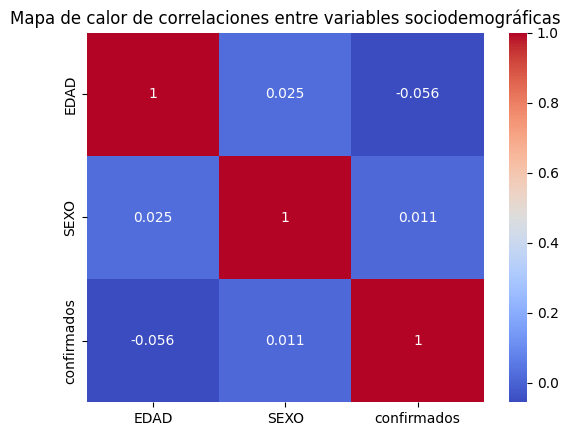

In [34]:
df_colombia['SEXO'] = df_colombia['SEXO'].replace({'M': 0, 'F': 1})

# Ver correlaciones entre variables relevantes
correlaciones = df_colombia[['EDAD', 'SEXO', 'confirmados']].corr()
print(correlaciones)

# Visualizar con un mapa de calor
sns.heatmap(correlaciones, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones entre variables sociodemográficas')
plt.show()




Este mapa de calor nos muestra matriz de correlación entre la Edad, el Sexo y Confirmados.
 
- Relación entre edad y casos de dengue: No hay una relación significativa, ya que la correlación es muy baja y negativa (-0.055879). La edad no parece influir en la cantidad de casos confirmados.

- Relación entre sexo y casos de dengue: La correlación es casi nula (0.010877), lo que indica que hombres y mujeres tienen un riesgo similar de contagio en los datos analizados.

- Relación entre edad y sexo: La correlación es muy baja (0.024678), lo que muestra que no hay una conexión entre la edad y el sexo de las personas afectadas.

Las variables edad y sexo no parecen ser factores determinantes en la distribución de los casos de dengue en el conjunto de datos analizado.

## ¿Cómo ha evolucionado el número de casos a lo largo del tiempo? 

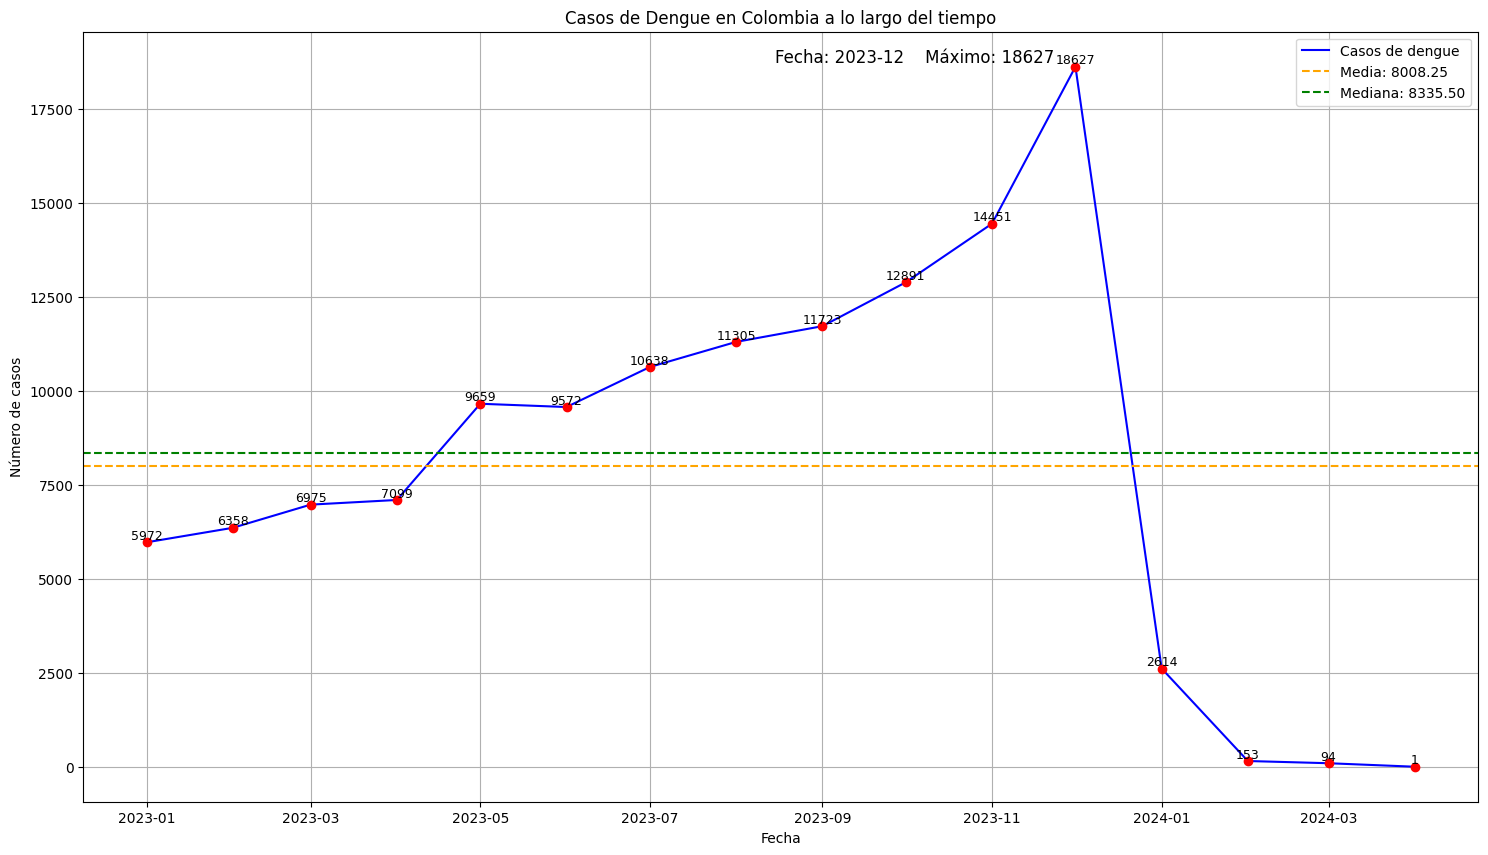

In [35]:
# Convertir la columna de fechas
df_colombia['FEC_NOT'] = pd.to_datetime(df_colombia['FEC_NOT'], errors='coerce')

# Crear una nueva columna con año y mes
df_colombia['AÑO_MES'] = df_colombia['FEC_NOT'].dt.to_period('M')

# Agrupar los casos por mes
casos_mensuales = df_colombia.groupby('AÑO_MES').size().reset_index(name='Casos')
casos_mensuales['AÑO_MES'] = casos_mensuales['AÑO_MES'].dt.to_timestamp()
casos_mensuales.set_index('AÑO_MES', inplace=True)

# Calcular el valor máximo de casos
max_casos = casos_mensuales['Casos'].max()
max_fecha = casos_mensuales['Casos'].idxmax()  # Obtener la fecha correspondiente al máximo
max_fecha_str = max_fecha.strftime('%Y-%m')  # Formatear la fecha a 'Año-Mes'

# Calcular media y mediana
media_casos = casos_mensuales['Casos'].mean()
mediana_casos = casos_mensuales['Casos'].median()

# Visualización
plt.figure(figsize=(18, 10))

# Crear el gráfico de líneas
plt.plot(casos_mensuales.index, casos_mensuales['Casos'], label='Casos de dengue', color='blue')

# Marcar cada pico
for index in casos_mensuales['Casos'].index:
    if casos_mensuales['Casos'][index] == max_casos or casos_mensuales['Casos'][index] > 0:
        plt.plot(index, casos_mensuales['Casos'][index], 'ro')  # Marcar el pico con un punto rojo
        plt.text(index, casos_mensuales['Casos'][index], f'{casos_mensuales["Casos"][index]}', 
                 fontsize=9, color='black', verticalalignment='bottom', horizontalalignment='center')

# Añadir el texto del valor máximo y la fecha en el gráfico
plt.text(max_fecha, max_casos, f'Fecha: {max_fecha_str}    Máximo: {max_casos}    ', 
         fontsize=12, color='black', 
         verticalalignment='bottom', horizontalalignment='right')

# Añadir líneas para la media y la mediana
plt.axhline(y=media_casos, color='orange', linestyle='--', label=f'Media: {media_casos:.2f}')
plt.axhline(y=mediana_casos, color='green', linestyle='--', label=f'Mediana: {mediana_casos:.2f}')

# Añadir etiquetas y título
plt.title('Casos de Dengue en Colombia a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()



Aqui vemos los casos de dengue en Colombia a lo largo del tiempo, donde el eje Y representa los números de casos y el X la Fecha en los que los hubieron. Notamos que el máximo de casos de dengue fue de 18627 casos y se alcanzo el mes 12 (diciembre) del año 2023. Hice un **analisis inferencial** y como resultado vemos que esto se puede atribuir a varios factores interrelacionados.

Durante este año, se registraron más de 5 millones de casos de dengue a nivel mundial, con cerca del 80% de ellos en América [Ver cita](​https://www.tiempo.com/noticias/actualidad/oms-alerta-aumento-casos-dengue-grave-amenaza-mundial-2023-mosquito-picadura.html)

Además, el cambio climático ha desempeñado un papel crucial al crear condiciones más favorables para la proliferación de mosquitos vectores en regiones que anteriormente no eran afectadas. El calentamiento global ha permitido que estos mosquitos sobrevivan en zonas más al norte, aumentando así la exposición al dengue​
[Ver cita](https://noticiasambientales.com/medio-ambiente/el-aumento-de-los-casos-de-dengue-es-una-grave-amenaza-alerta-la-oms/). Este fenómeno, junto con las alteraciones climáticas causadas por fenómenos como El Niño, ha contribuido al aumento de las temperaturas y la humedad, factores que favorecen la transmisión del virus​.

Durante la pandemia de COVID-19, se observó una reducción en la notificación de casos de dengue[Ver cita](https://www.who.int/es/emergencies/disease-outbreak-news/item/2023-DON498), lo que provocó que muchas personas acumularan falta de inmunidad a ciertos serotipos del virus. Esta falta de inmunidad ha hecho que las poblaciones sean más vulnerables a infecciones por dengue en 2023​.

El contexto de debilidad en los sistemas de salud, que aún se recuperan de la pandemia, también ha exacerbado la situación, con dificultades en la detección y tratamiento de casos graves​. Esto, combinado con inestabilidad política y un aumento en los movimientos poblacionales, ha creado un entorno propicio para que la epidemia se propague aún más​.[Ver cita](https://www.paho.org/es/temas/dengue)

**Para esto tambien utilice metodos estadisticos mediante funciones de que ya trae implementada python pero a continuación explicare.**

**Cálculo de Estadísticas en los Casos de Dengue**

***1. Media***

La media aritmética de un conjunto de datos se calcula como:

$$
\mu = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

donde:
- \(n\) es el número total de observaciones.
- \(x_i\) representa cada uno de los valores de los casos de dengue.

***2. Mediana***

La mediana es el valor que divide un conjunto de datos en dos partes iguales. Se calcula de la siguiente manera:

- Si \(n\) es impar:
$$
\text{Mediana} = x_{\left(\frac{n+1}{2}\right)}
$$

- Si \(n\) es par:
$$
\text{Mediana} = \frac{x_{\left(\frac{n}{2}\right)} + x_{\left(\frac{n}{2}+1\right)}}{2}
$$

donde \(x\) es el conjunto de datos ordenado.

***3. Valor Máximo***

El valor máximo de un conjunto de datos se determina como:

$$
x_{\text{max}} = \max(x_1, x_2, \ldots, x_n)
$$

donde \(x_i\) son los valores de los casos de dengue.


In [36]:
nacionalidades_counts = df_colombia['nombre_nacionalidad'].value_counts()
#print(nacionalidades_counts)
print(len(df_colombia))

128132


## ¿Cual es la poblacións más afectadas por le dengue?

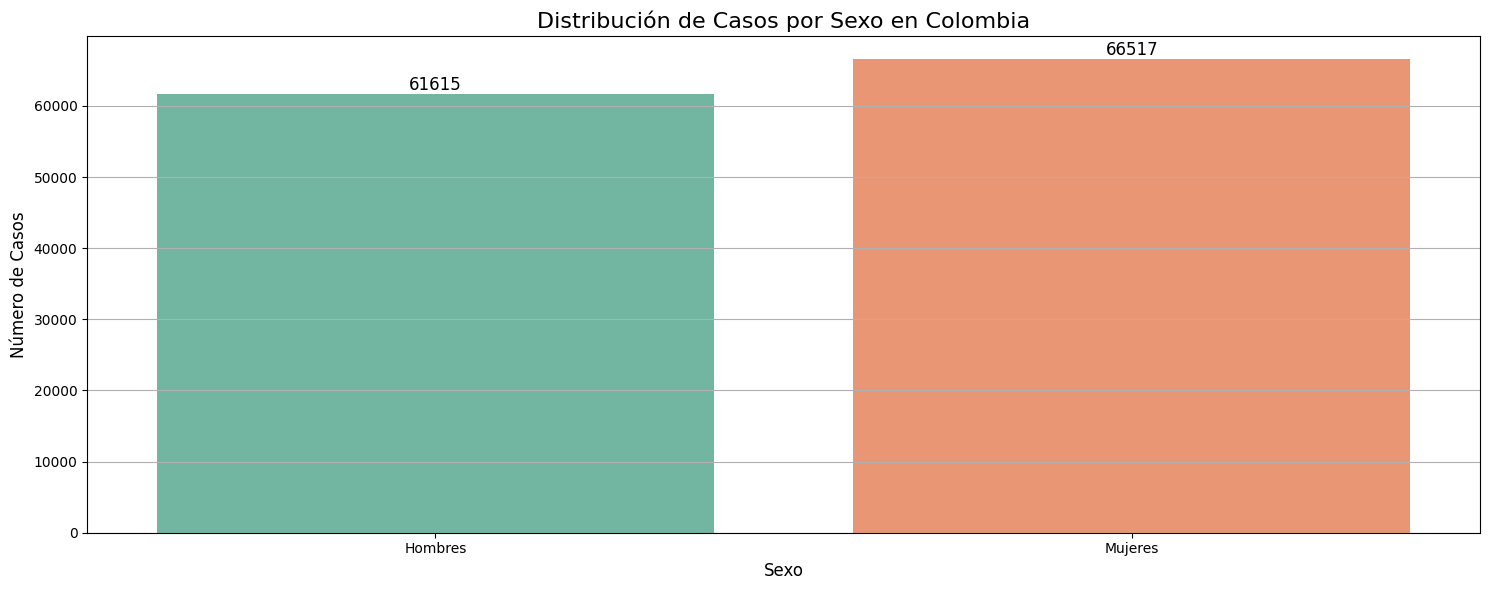

In [37]:
# Distribución de casos por sexo
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='SEXO', data=df_colombia, palette='Set2')
plt.title('Distribución de Casos por Sexo en Colombia', fontsize=16)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)
plt.xticks(rotation=0)

# Personalizar etiquetas del eje x para que muestren "Hombres" y "Mujeres"
ax.set_xticklabels(['Hombres', 'Mujeres'])
plt.grid(axis='y')

# Agregar la leyenda de datos (número de casos) sobre las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()




El análisis de los datos revela que hay un número mayor de casos confirmados de dengue en mujeres en comparación con hombres. Esto puede ser significativo para entender la dinámica de la enfermedad en la población colombiana.

- ***Exposición Diferencial:*** Las mujeres podrían estar más expuestas a los mosquitos debido a sus roles en el hogar y la comunidad, lo que podría incluir la recolección de agua o el cuidado de los niños, actividades que a menudo se realizan al aire libre.
Factores Biológicos:

- ***Sistema Inmunológico:*** Algunos estudios sugieren que las mujeres pueden tener un sistema inmunológico más robusto, lo que les permite lidiar mejor con las infecciones, aunque esto puede resultar en una mayor búsqueda de atención médica y, por lo tanto, en más diagnósticos confirmados.

[ver cita](https://www.who.int/news-room/fact-sheets/detail/dengue-and-severe-dengue)


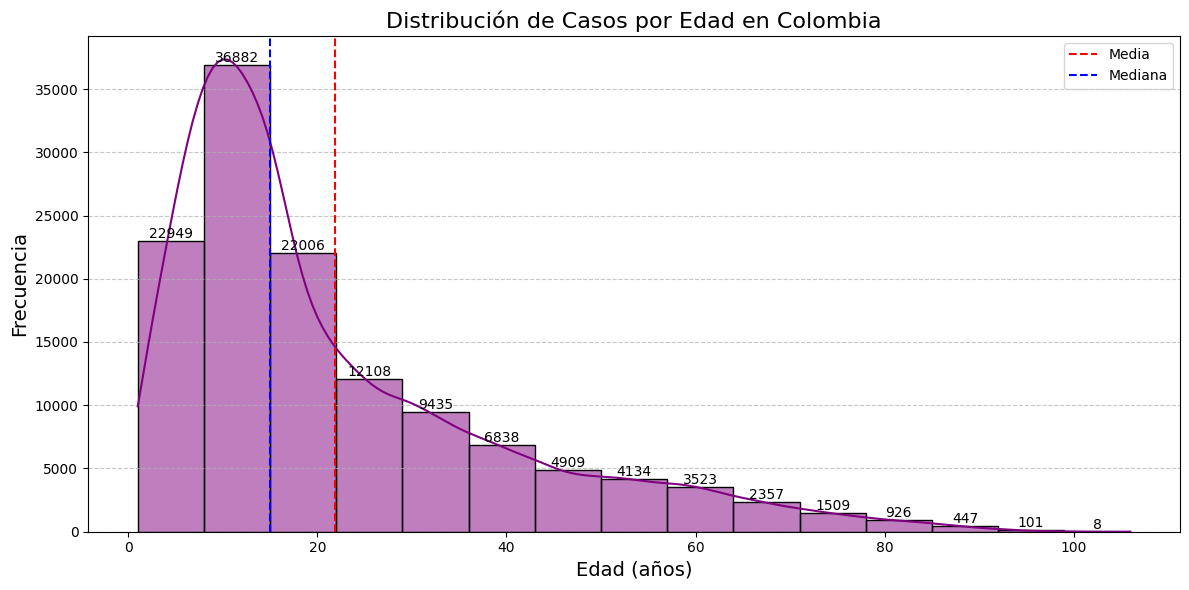

In [38]:
# Distribución por grupos de edad
plt.figure(figsize=(12, 6))
hist_data = sns.histplot(df_colombia['EDAD'], bins=15, kde=True, color='purple')

plt.title('Distribución de Casos por Edad en Colombia', fontsize=16)
plt.xlabel('Edad (años)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Agregar líneas para media y mediana
plt.axvline(df_colombia['EDAD'].mean(), color='red', linestyle='--', label='Media')
plt.axvline(df_colombia['EDAD'].median(), color='blue', linestyle='--', label='Mediana')

# Añadir leyenda
plt.legend()

# Añadir etiquetas en cada barra
for patch in hist_data.patches:
    height = patch.get_height()
    width = patch.get_x() + patch.get_width() / 2
    plt.text(width, height, int(height), ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Resultados**

***Distribución de Casos por Edad:***

Se observa un aumento notable en la cantidad de casos de dengue en los grupos de edad de 10, 15 y 20 años. La media de los casos se sitúa entre 17 y 18 años, lo que indica que los adolescentes y jóvenes adultos son especialmente vulnerables a la infección.
Interpretación

***Frecuencia de Casos:***

La mayor incidencia en los grupos de edad de 10 a 20 años puede deberse a varios factores. Este rango de edad incluye a adolescentes y jóvenes que tienden a ser más activos socialmente, lo que puede aumentar su exposición a áreas donde habitan mosquitos portadores de dengue.

***Comportamiento Social:***

Los adolescentes y jóvenes son más propensos a participar en actividades al aire libre, lo que puede incrementar su riesgo de picaduras de mosquitos. Además, es común que este grupo de edad no utilice adecuadamente métodos de prevención, como repelentes o mosquiteros, lo que puede contribuir a la mayor incidencia de casos.

In [39]:
# Número de casos por departamento
casos_por_depto = df_colombia.groupby('COD_DPTO_O').size().reset_index(name='Casos')

## ¿Cuáles son las áreas más afectadas por los casos de dengue?

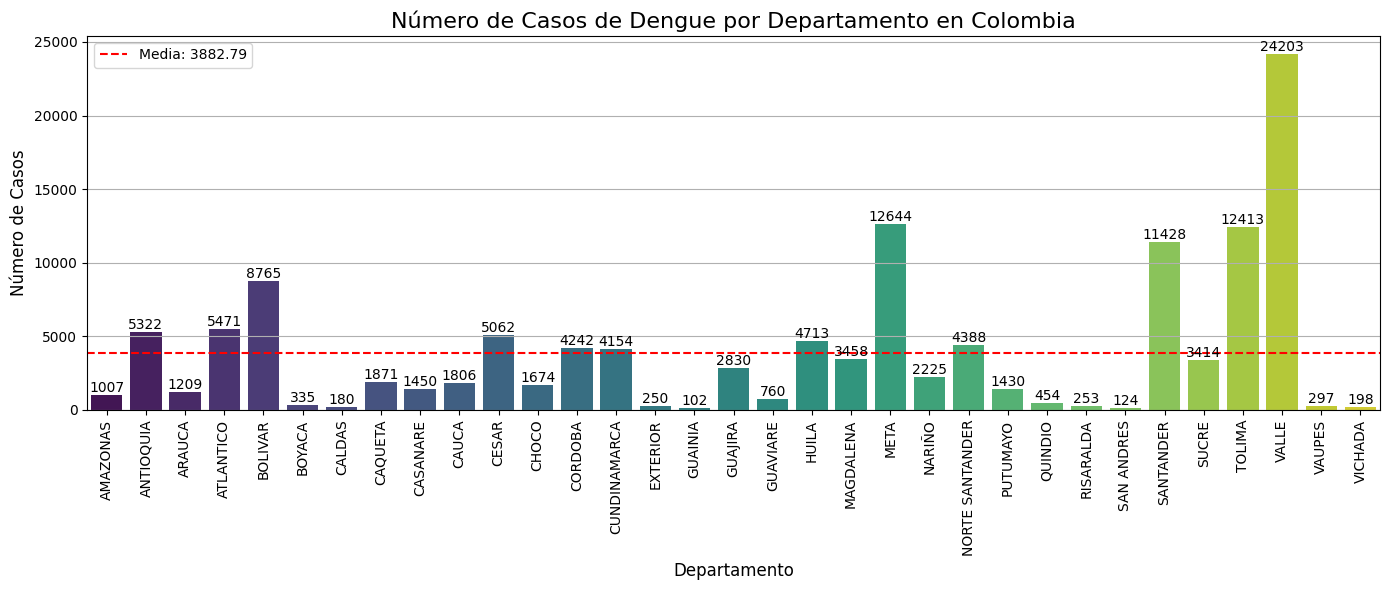

In [40]:
df_codig_dep = pd.read_csv('codigos_dep.csv')

# Número de casos por departamento
casos_por_depto = df_colombia.groupby('Departamento_ocurrencia').size().reset_index(name='Casos')

# Calcular la media
media_casos = casos_por_depto['Casos'].mean()

# Visualización de casos por departamento
plt.figure(figsize=(14, 6))
bar_plot = sns.barplot(x='Departamento_ocurrencia', y='Casos', data=casos_por_depto, palette='viridis')
plt.title('Número de Casos de Dengue por Departamento en Colombia', fontsize=16)
plt.xlabel('Departamento', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y')

# Añadir etiquetas de los datos en las barras
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', fontsize=10)

# Añadir la línea de la media
plt.axhline(media_casos, color='red', linestyle='--', label=f'Media: {media_casos:.2f}')
plt.legend()

plt.tight_layout()
plt.show()



Podemos apreciar que más de 10 departamentos estan por encima de la media,siendo valle, Meta y Tolima los que más caos presenta.

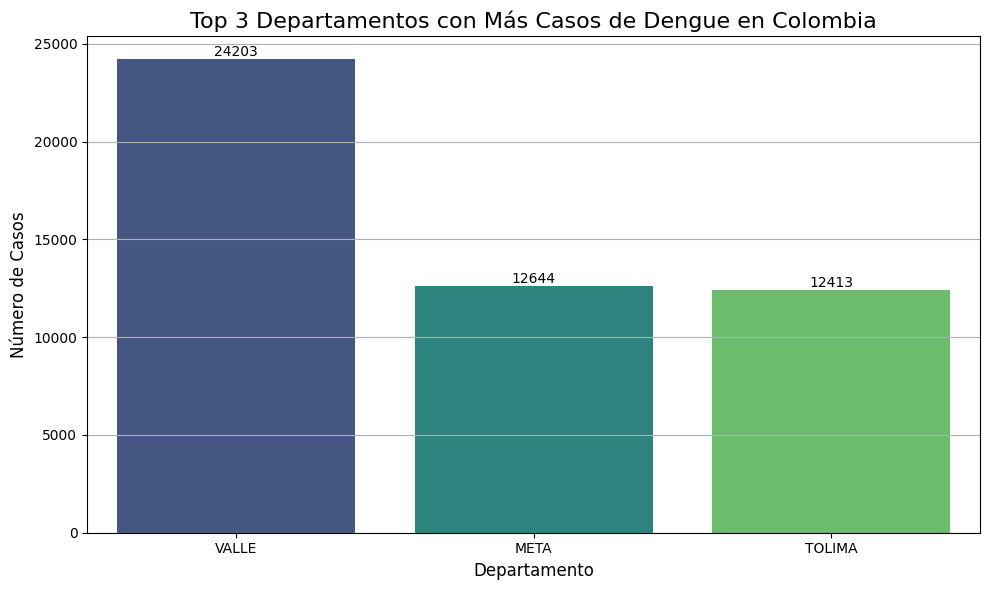

In [41]:
# Obtener el top 3 de departamentos con más casos
top_3_dept = casos_por_depto.nlargest(3, 'Casos')

# Visualización de casos por departamento
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Departamento_ocurrencia', y='Casos', data=top_3_dept, palette='viridis')
plt.title('Top 3 Departamentos con Más Casos de Dengue en Colombia', fontsize=16)
plt.xlabel('Departamento', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y')

# Añadir etiquetas de los datos en las barras
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


Aqui vemos el top 3 de los departamentos con mas caos reportados... ¿por qué? 

**Análisis Inferencial de los Casos de Dengue en Valle del Cauca, Meta y Tolima**
- **Descripción General:**

***Valle del Cauca:*** Este departamento es uno de los más poblados de Colombia y presenta un clima cálido y húmedo, condiciones que favorecen la proliferación del mosquito Aedes aegypti, el principal vector del dengue. La urbanización acelerada en ciudades como Cali puede contribuir a un aumento en la transmisión del virus.

***Meta:*** Ubicado en la región de los Llanos Orientales, el Meta tiene una economía basada en la agricultura y la ganadería. Los cambios en el uso de la tierra, como la deforestación para cultivos, pueden generar más criaderos de mosquitos. Además, la movilidad de la población hacia áreas rurales podría facilitar la diseminación del dengue.

***Tolima:*** Este departamento también presenta un clima propicio para la transmisión del dengue, con diversas zonas rurales y urbanas. La variabilidad en los casos podría estar relacionada con las condiciones de saneamiento y acceso a servicios de salud.

- **Comparación de Casos:**

Al observar los casos reportados en estos tres departamentos, se puede inferir que las características socioeconómicas y ambientales juegan un papel crucial en la incidencia del dengue. 

Por ejemplo, Valle del Cauca puede tener un número elevado de casos debido a su mayor densidad poblacional y actividades urbanas.

En contraste, Meta y Tolima, aunque menos poblados, pueden experimentar brotes debido a factores específicos como el cambio estacional y la movilidad de la población.

[Ver cita](https://www.ins.gov.co/Paginas/Inicio.aspx)

In [42]:
# Número de casos por departamento
casos_por_depto = df_colombia.groupby('Departamento_ocurrencia').size().reset_index(name='Casos')
print(casos_por_depto)

# Calcular la media
media_casos = casos_por_depto['Casos'].mean()

casos_por_depto.to_excel('casos_dep.xlsx', index=False)


   Departamento_ocurrencia  Casos
0                 AMAZONAS   1007
1                ANTIOQUIA   5322
2                   ARAUCA   1209
3                ATLANTICO   5471
4                  BOLIVAR   8765
5                   BOYACA    335
6                   CALDAS    180
7                  CAQUETA   1871
8                 CASANARE   1450
9                    CAUCA   1806
10                   CESAR   5062
11                   CHOCO   1674
12                 CORDOBA   4242
13            CUNDINAMARCA   4154
14                EXTERIOR    250
15                 GUAINIA    102
16                 GUAJIRA   2830
17                GUAVIARE    760
18                   HUILA   4713
19               MAGDALENA   3458
20                    META  12644
21                  NARIÑO   2225
22         NORTE SANTANDER   4388
23                PUTUMAYO   1430
24                 QUINDIO    454
25               RISARALDA    253
26              SAN ANDRES    124
27               SANTANDER  11428
28            

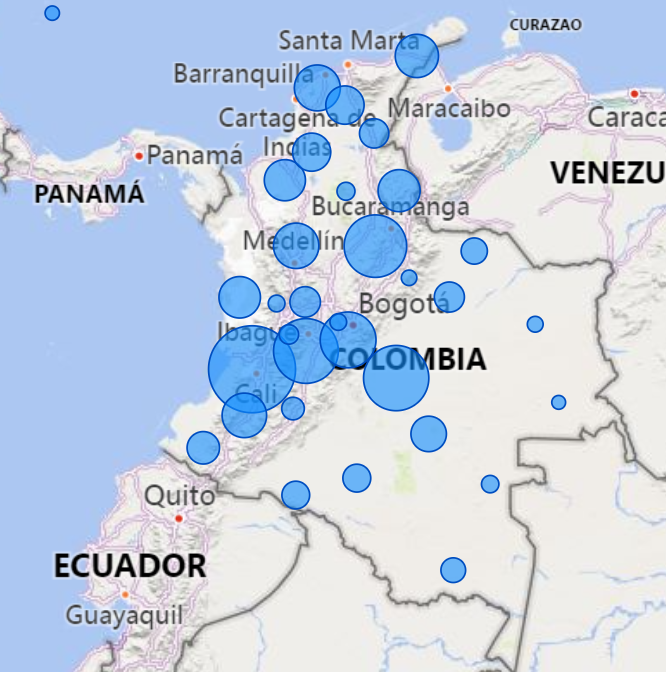

In [43]:
from IPython.display import Image
Image(filename='Captura de pantalla 2024-10-22 222146.png')

In [44]:
# Asegurarte de que las columnas están en formato numérico
df_colombia['EDAD'] = pd.to_numeric(df_colombia['EDAD'], errors='coerce')
df_colombia['estrato'] = pd.to_numeric(df_colombia['estrato'], errors='coerce')
df_colombia['confirmados'] = pd.to_numeric(df_colombia['confirmados'], errors='coerce')

# Eliminar filas con valores nulos en las columnas relevantes
df_colombia = df_colombia.dropna(subset=['EDAD', 'estrato', 'confirmados'])

# Definir las variables X (predictoras) e y (variable objetivo)
X = df_colombia[['EDAD', 'estrato']]
y = df_colombia['confirmados']

# Asegurarse de que X y y tienen la misma longitud
print(f"Forma de X: {X.shape}, Forma de y: {y.shape}")

Forma de X: (122713, 2), Forma de y: (122713,)


In [45]:
# Ajustar el modelo de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

# Mostrar los coeficientes y el intercepto
print(f"Coeficientes: {model.coef_}")
print(f"Intercepto: {model.intercept_}")

# Predicción (opcional)
predicciones = model.predict(X)

# Agregar predicciones al DataFrame (opcional)
df_colombia['predicciones'] = predicciones

# Mostrar las primeras filas del DataFrame con las predicciones
print(df_colombia[['EDAD', 'estrato', 'confirmados', 'predicciones']].head())

Coeficientes: [-0.00133384  0.02395573]
Intercepto: 0.792804791220171
   EDAD  estrato  confirmados  predicciones
0    23      1.0            1      0.786082
1     8      3.0            1      0.854001
2    13      3.0            1      0.847332
3    88      3.0            1      0.747294
4    43      3.0            0      0.807317


**Análisis Inferencial**

- Coeficientes:

***EDAD:*** El coeficiente asociado a EDAD es -0.00133. Esto indica que, en promedio, por cada año adicional de edad, el número de casos confirmados de dengue disminuye en aproximadamente 0.00133 casos, manteniendo constante el estrato. Este resultado sugiere una relación inversa entre la edad y los casos confirmados, pero el efecto es muy pequeño.

***Estrato:*** El coeficiente asociado a estrato es 0.02396. Esto significa que por cada incremento de 1 unidad en el estrato, el número de casos confirmados de dengue aumenta en aproximadamente 0.02396 casos, manteniendo constante la EDAD. Este resultado indica que a medida que se aumenta el estrato socioeconómico, podría haber un ligero incremento en los casos confirmados.

- Intercepto:

El intercepto es 0.7928, lo que significa que cuando tanto EDAD como estrato son cero (aunque en la práctica esto puede no tener sentido), el modelo predice un valor de aproximadamente 0.79 casos confirmados.

- Predicciones:

El DataFrame muestra las primeras filas con las predicciones. En la columna predicciones, puedes observar que el modelo intenta estimar el número de casos confirmados basado en los valores de EDAD y estrato.

  Rango_Edad  Total_Personas  Casos_Confirmados  Incidencia  \
0       0-10           32176              25887   80.454376   
1      11-20           41932              35368   84.346084   
2      21-30           17387              13715   78.880773   
3      31-40           11513               8778   76.244246   
4      41-50            7242               5508   76.056338   
5      51-60            5507               4146   75.286000   
6      61-70            3825               2962   77.437908   
7      71-80            2010               1533   76.268657   
8      81-90             942                691   73.354565   
9     91-100             173                128   73.988439   

   Riesgo_Comparativo  
0            1.000000  
1            1.048372  
2            0.980441  
3            0.947671  
4            0.945335  
5            0.935760  
6            0.962507  
7            0.947974  
8            0.911754  
9            0.919632  


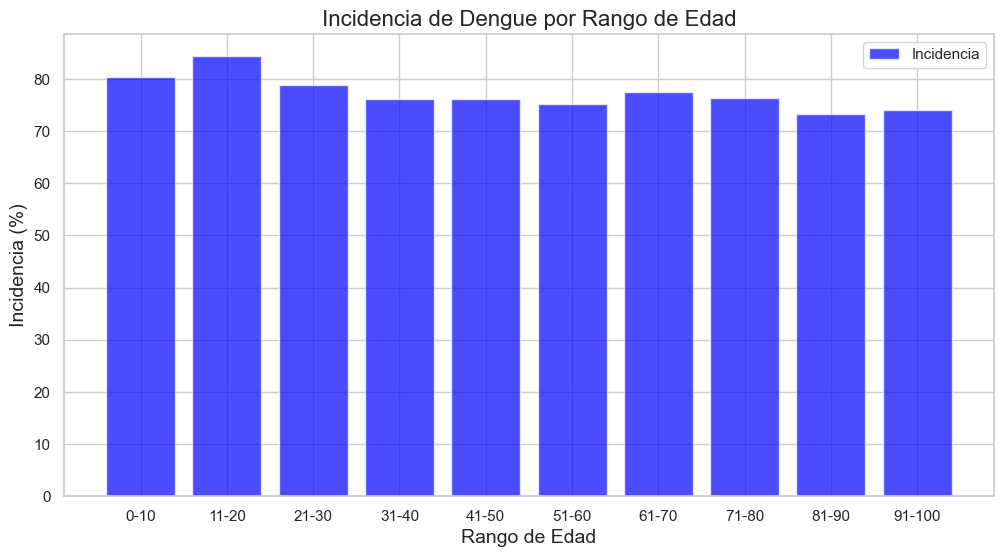

In [49]:
# Crear un rango de edades
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Rango de edades
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df_colombia['Rango_Edad'] = pd.cut(df_colombia['EDAD'], bins=bins, labels=labels, right=False)

# Calcular el total de personas y casos confirmados por rango de edad
incidencia = df_colombia.groupby('Rango_Edad').agg(
    Total_Personas=('confirmados', 'size'),
    Casos_Confirmados=('confirmados', 'sum')
).reset_index()

# Calcular la incidencia (porcentaje de casos confirmados)
incidencia['Incidencia'] = (incidencia['Casos_Confirmados'] / incidencia['Total_Personas']) * 100

# Calcular el Riesgo Comparativo REM
# Suponiendo que tomamos el primer grupo como referencia
incidencia['Riesgo_Comparativo'] = incidencia['Incidencia'] / incidencia['Incidencia'].iloc[0]

# Mostrar la incidencia y el riesgo comparativo
print(incidencia[['Rango_Edad', 'Total_Personas', 'Casos_Confirmados', 'Incidencia','Riesgo_Comparativo']])

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.bar(incidencia['Rango_Edad'], incidencia['Incidencia'], color='blue', alpha=0.7, label='Incidencia')
plt.xlabel('Rango de Edad', fontsize=14)
plt.ylabel('Incidencia (%)', fontsize=14)
plt.title('Incidencia de Dengue por Rango de Edad', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

**Análisis Inferencial del Riesgo Comparativo y la Incidencia de Dengue por Rango de Edad**

Los resultados obtenidos nos proporcionan una visión clara sobre cómo se distribuyen los casos de dengue en diferentes rangos de edad en tu base de datos. A continuación, desglosamos el análisis inferencial:

- 1. **Incidencia**

La incidencia es un indicador fundamental en epidemiología que representa el porcentaje de casos confirmados en un grupo específico. En este caso, se expresa como el número de casos confirmados de dengue por cada rango de edad.

Fórmula de Incidencia:


$$\text{Incidencia} = \left( \frac{\text{Casos Confirmados}}{\text{Total Personas}} \right) \times 100$$

Los resultados muestran que:

El rango de edad **0-10** tiene la incidencia más alta (**80.45%**), lo que sugiere que, de cada 100 personas en este grupo, aproximadamente 80 han sido diagnosticadas con dengue.

La incidencia disminuye en los grupos de edad mayores, alcanzando un mínimo de **73.35%** en el rango de **81-90**. Este patrón puede indicar que los grupos de edad más jóvenes están más expuestos al virus o que hay otros factores que influyen en la transmisión del dengue en estos grupos.

- 2. **Riesgo Comparativo (REM)**

El Riesgo Comparativo se utiliza para comparar la incidencia de dengue entre los diferentes rangos de edad, tomando como referencia el grupo de edad más bajo (0-10 años).

**Fórmula del Riesgo Comparativo**:


$$\text{Riesgo Comparativo} = \frac{\text{Incidencia del Grupo}}{\text{Incidencia del Grupo de Referencia}}$$

En este caso, el grupo de referencia tiene un riesgo comparativo de 1 (porque es el grupo de referencia). Los valores de riesgo comparativo para otros grupos son:

 **1.048** para el grupo **11-20**, lo que indica que tienen un riesgo ligeramente mayor de contraer dengue en comparación con el grupo de referencia.

A medida que avanzamos hacia grupos de mayor edad, el riesgo comparativo tiende a disminuir, alcanzando un mínimo de **0.912** en el rango de **81-90**. Esto sugiere que los grupos de mayor edad tienen un riesgo inferior de contraer dengue en comparación con el grupo más joven.

- 3. **Interpretación del Riesgo Comparativo**

Un riesgo comparativo mayor que 1 indica que el grupo tiene una mayor incidencia de dengue en comparación con el grupo de referencia.

Un riesgo comparativo menor que 1 indica que el grupo tiene una menor incidencia de dengue en comparación con el grupo de referencia.

Por lo tanto, los resultados sugieren que los grupos de edad más jóvenes, particularmente los de 0-10 y 11-20, son los más afectados, mientras que los grupos de edad más avanzados tienden a tener una menor incidencia.

- 4. **Estadísticas y Ecuaciones Usadas**

Incidencia: Calcular el porcentaje de casos en relación con el total de personas en cada grupo.

Riesgo Comparativo: Comparar la incidencia entre grupos para entender su relación respecto al grupo de referencia.

## Pongamos la lupa en Barranquilla y sus alrededores!

In [55]:
df_baq = pd.read_excel('Data_Baq.xlsx')
df_baq.head()

,Persona_id,fecha_nacimiento,genero,condición_valor_fuente,nombre de condicin,condición_fecha_inicio,visita_fecha_inicio,fecha_final_visita,ciudad
0,858,1974-12-23,MASCULINO,A90X,FIEBRE DEL DENGUE CLASICO,2022-12-28,2022-12-23,2022-12-28,BARRRANQUILLA
1,3140,1999-03-20,MASCULINO,A90X,FIEBRE DEL DENGUE CLASICO,2021-10-25,2021-10-25,2021-10-29,MALAMBO
2,3146,2002-05-12,FEMENINO,A90X,FIEBRE DEL DENGUE CLASICO,2018-11-16,2018-11-16,2018-11-16,MALAMBO
3,3755,1995-01-31,FEMENINO,A90X,FIEBRE DEL DENGUE CLASICO,2021-11-01,2021-11-01,2021-11-03,BARRRANQUILLA
4,3794,2001-08-31,MASCULINO,A90X,FIEBRE DEL DENGUE CLASICO,2023-09-26,2023-09-25,2023-10-02,SOLEDAD


In [56]:
df_baq['condición_fecha_inicio'] = pd.to_datetime(df_baq['condición_fecha_inicio'], errors='coerce')
df_baq['visita_fecha_inicio'] = pd.to_datetime(df_baq['visita_fecha_inicio'], errors='coerce')
df_baq['fecha_final_visita'] = pd.to_datetime(df_baq['fecha_final_visita'], errors='coerce')

print(df_baq.isnull().sum())


Persona_id                0
fecha_nacimiento          0
genero                    0
condición_valor_fuente    0
nombre de condicin        0
condición_fecha_inicio    0
visita_fecha_inicio       0
fecha_final_visita        0
ciudad                    0
dtype: int64


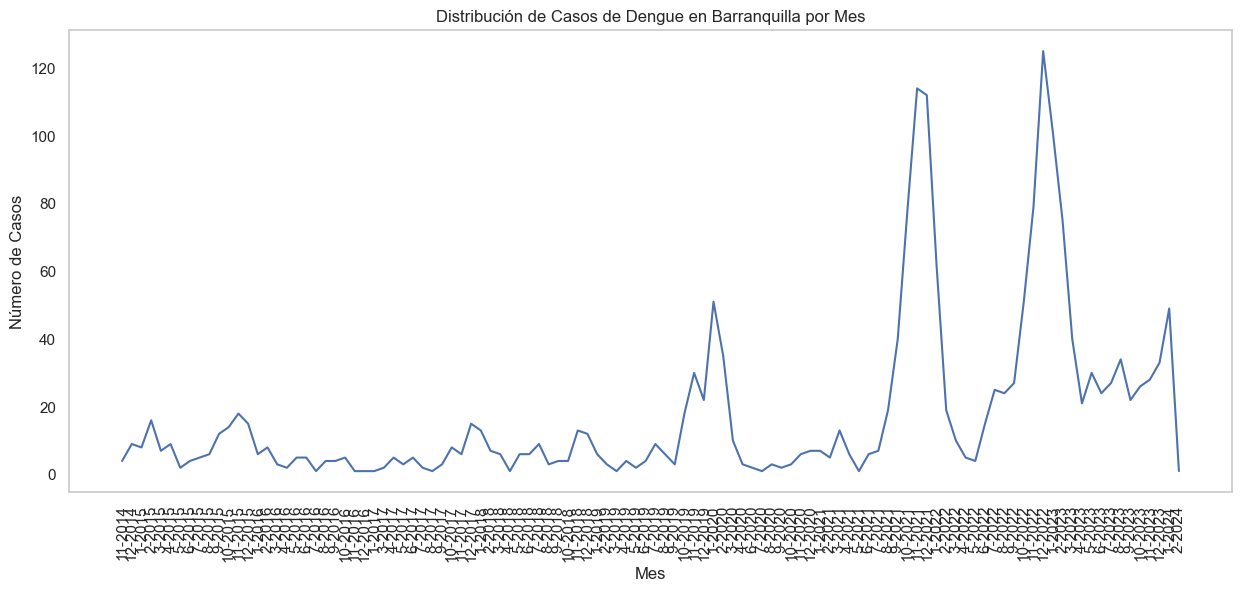

In [61]:
# Extraer el año y mes de la fecha de inicio de la condición
df_baq['año'] = df_baq['condición_fecha_inicio'].dt.year
df_baq['mes'] = df_baq['condición_fecha_inicio'].dt.month

# Contar casos por mes
casos_por_mes = df_baq.groupby(['año', 'mes']).size().reset_index(name='casos')

plt.figure(figsize=(12, 6))
plt.plot(casos_por_mes['casos'])
plt.title('Distribución de Casos de Dengue en Barranquilla por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Casos')
plt.xticks(ticks=range(len(casos_por_mes)), labels=casos_por_mes['mes'].astype(str) + '-' + casos_por_mes['año'].astype(str), rotation=90)
plt.grid()
plt.show()

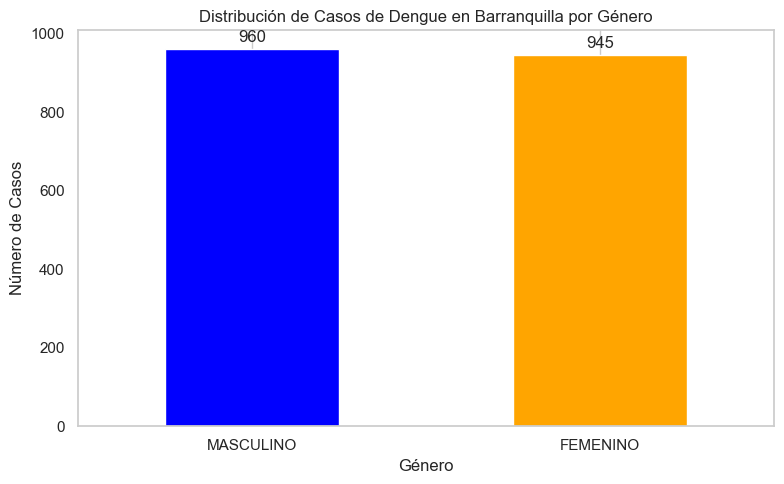

In [64]:
# Contar casos por género
casos_por_genero = df_baq['genero'].value_counts()

plt.figure(figsize=(8, 5))
bars = casos_por_genero.plot(kind='bar', color=['blue', 'orange'])

# Agregar etiquetas de datos
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 10,  # Ajusta la posición vertical de la etiqueta
        int(bar.get_height()),  # Valor de la barra
        ha='center',  
        va='bottom'   
    )

plt.title('Distribución de Casos de Dengue en Barranquilla por Género')
plt.xlabel('Género')
plt.ylabel('Número de Casos')
plt.xticks(rotation=0)

plt.grid(axis='y')
plt.tight_layout()  
plt.show()



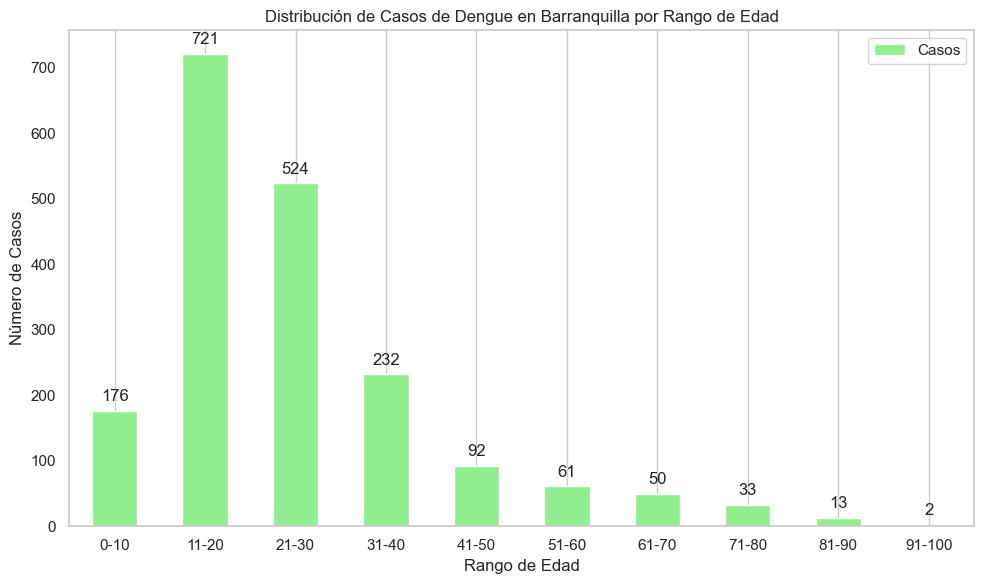

In [67]:
df_baq['edad'] = (pd.to_datetime('today') - df_baq['fecha_nacimiento']).dt.days // 365

# Agrupar por rangos de edad
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df_baq['rango_edad'] = pd.cut(df_baq['edad'], bins=bins, labels=labels, right=False)

# Contar casos por rango de edad
casos_por_rango = df_baq['rango_edad'].value_counts().sort_index()

# Graficar
plt.figure(figsize=(10, 6))
bars = casos_por_rango.plot(kind='bar', color='lightgreen')

# Agregar etiquetas de datos
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 10,  # Ajusta la posición vertical de la etiqueta
        int(bar.get_height()),  # Valor de la barra
        ha='center',  # Alineación horizontal
        va='bottom'   # Alineación vertical
    )

plt.title('Distribución de Casos de Dengue en Barranquilla por Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Número de Casos')
plt.xticks(rotation=0)

# Agregar leyenda
plt.legend(['Casos'], loc='upper right')

plt.grid(axis='y')
plt.tight_layout()  # Ajusta el layout para que no se corten las etiquetas
plt.show()


**Análisis Inferencial de los Casos de Dengue en Barranquilla**

- **1. Distribución por Género**

Los resultados indican que hay una distribución bastante equilibrada de los casos de dengue entre los géneros:

Masculino: 960 casos
Femenino: 945 casos

***Observaciones:***

Equilibrio de Género: La diferencia entre los casos masculinos y femeninos es mínima (15 casos), lo que sugiere que ambos géneros están igualmente expuestos al riesgo de contraer dengue en Barranquilla. Este patrón podría indicar que los factores ambientales y sociales que contribuyen a la transmisión del dengue afectan de manera similar a hombres y mujeres.

Implicaciones de Salud Pública: Dado que ambos géneros presentan un riesgo similar, las campañas de prevención y sensibilización deben dirigirse a toda la población sin discriminación de género, enfatizando prácticas de protección, como el uso de mosquiteros y repelentes.

- **2.Tendencias Temporales en los Casos de Dengue**

***Observaciones:***

Patrones Estacionales: A partir de la serie temporal, se puede observar que hay meses y años con picos significativos de casos, como en enero de 2024, donde se reportan 49 casos. Este aumento podría estar relacionado con condiciones climáticas favorables para la reproducción del mosquito Aedes aegypti, que transmite el dengue, así como con cambios en la movilidad de la población y la densidad del mosquito.

Tendencias a Largo Plazo: Comparando los datos de varios años, se puede notar un aumento en la frecuencia de casos durante ciertos períodos. Esto puede implicar una mayor necesidad de vigilancia y medidas preventivas durante los meses más críticos, posiblemente coincidiendo con las temporadas de lluvia.

Estrategias de Mitigación: Con base en los picos observados, es crucial que las autoridades locales implementen campañas de sensibilización y prevención durante los meses previos a las temporadas de lluvia, donde el riesgo de transmisión puede ser mayor.

## Sabiento todo esto voy de dar estas recomendaciones para los casos de dengue tanto  como a nivel nacional y a nivel ciudad.

**Recomendaciones**

- Fortalecer las Campañas de Prevención:

Dada la alta incidencia de dengue en los grupos de edad más jóvenes, especialmente en el rango de 0-10 años, es crucial implementar campañas de concientización y educación dirigidas a padres y cuidadores. Estas campañas deben incluir información sobre la prevención del dengue, el manejo adecuado del agua y la eliminación de criaderos de mosquitos.

- Monitoreo y Vigilancia Epidemiológica:

Se recomienda establecer un sistema de monitoreo continuo de los casos de dengue a nivel nacional y regional. Esto incluye la recolección de datos desagregados por edad, estrato socioeconómico y ubicación geográfica para facilitar la identificación de áreas de riesgo y brotes emergentes.

- Intervenciones Dirigidas a Grupos Vulnerables:

Es fundamental priorizar intervenciones en comunidades donde se ha identificado un mayor riesgo comparativo de dengue. Las estrategias pueden incluir la fumigación en áreas con alta densidad poblacional infantil y la distribución de mosquiteros tratados con insecticidas.

- Investigación de Factores Socioculturales:

Se sugiere llevar a cabo estudios adicionales para comprender mejor los factores socioculturales que influyen en la transmisión del dengue. Estos estudios ayudarán a diseñar intervenciones más efectivas y culturalmente adecuadas.

- Colaboración Interinstitucional:

Es importante fomentar la colaboración entre instituciones de salud pública, educación y medio ambiente para abordar de manera integral la prevención y control del dengue. La integración de esfuerzos puede mejorar la eficacia de las intervenciones y la educación comunitaria.

# Conclusiones del Análisis

## Análisis Nacional

1. **Distribución de Casos por Género:**
   - Se observó una distribución bastante equilibrada entre los casos de dengue en hombres y mujeres, con una ligera predominancia en hombres (960 casos) frente a mujeres (945 casos). Esto sugiere que ambos géneros están igualmente afectados por la enfermedad, lo que podría indicar la necesidad de campañas de prevención y educación dirigidas a toda la población.

2. **Patrones Estacionales:**
   - Se identificaron patrones estacionales en la ocurrencia de casos de dengue, con un aumento notable en los meses de mayor calor y lluvias. Esto resalta la importancia de implementar medidas preventivas durante los períodos de alta incidencia, ya que el dengue es una enfermedad transmitida por mosquitos que tienden a proliferar en condiciones húmedas y cálidas.

3. **Incidencia por Edad:**
   - Los rangos de edad más jóvenes, específicamente de 0 a 20 años, presentaron tasas de incidencia más elevadas. Esto podría sugerir una mayor exposición al virus en estos grupos, lo que requiere un enfoque especial en la prevención del dengue en la infancia y adolescencia.

4. **Riesgo Comparativo:**
   - Se observaron diferencias significativas en el riesgo comparativo de contraer dengue entre distintos grupos de edad. Los menores de 10 años tienen un riesgo comparativo más alto, lo que indica que son más susceptibles y deben ser un foco de atención en los programas de salud pública.

## Análisis en Barranquilla

1. **Distribución de Casos por Género:**
   - Al igual que a nivel nacional, Barranquilla mostró una distribución equilibrada entre los géneros, con 960 casos masculinos y 945 femeninos. Este hallazgo refuerza la idea de que las campañas de prevención deben abarcar a toda la población sin distinción de género.

2. **Rango de Edad y Casos Confirmados:**
   - La distribución de casos por rango de edad en Barranquilla reveló que los grupos más jóvenes son los más afectados, con un número significativo de casos en la franja de 0-10 años. Esto sugiere que se deben priorizar las estrategias de prevención en las escuelas y comunidades donde se concentran estos grupos.

3. **Tendencias Temporales:**
   - Al analizar los casos a lo largo de los años, se notó un aumento en los casos confirmados de dengue durante ciertos meses del año. Esta información es crucial para planificar y asignar recursos a la salud pública, especialmente durante las épocas de brotes.

4. **Necesidades de Salud Pública:**
   - Los datos indican la necesidad de una respuesta coordinada en la salud pública, que incluya no solo el tratamiento de los casos confirmados, sino también la educación y prevención de la enfermedad en la población, particularmente entre los más jóvenes.




# Referencias

**Dengue**

1. Organización Mundial de la Salud. (2023). **Dengue and severe dengue**. Recuperado de [OMS Dengue](https://www.who.int/news-room/fact-sheets/detail/dengue-and-severe-dengue)
2. Ministerio de Salud y Protección Social de Colombia. (2022). **Informe epidemiológico de dengue**. Recuperado de [MinSalud](https://www.minsalud.gov.co)


**Herramientas Estadísticas**

3. Scikit-learn. (2023). **Machine Learning in Python**. Recuperado de [Scikit-learn](https://scikit-learn.org/stable/)
4. Matplotlib. (2023). **Matplotlib: Visualization with Python**. Recuperado de [Matplotlib](https://matplotlib.org/)
5. Pandas. (2023). **Pandas: Python Data Analysis Library**. Recuperado de [Pandas](https://pandas.pydata.org/)

**Análisis de Datos**

6. Cleveland, W. S. (1993). **Visualizing Data**. Hobart Press.

**Herramientas y Bibliotecas**

7. NumPy. (2023). **NumPy: The fundamental package for scientific computing with Python**. Recuperado de [NumPy](https://numpy.org/)
8. SciPy. (2023). **SciPy: Scientific Computing Tools for Python**. Recuperado de [SciPy](https://www.scipy.org/)
9. Seaborn. (2023). **Seaborn: Statistical Data Visualization**. Recuperado de [Seaborn](https://seaborn.pydata.org/)

